In [29]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

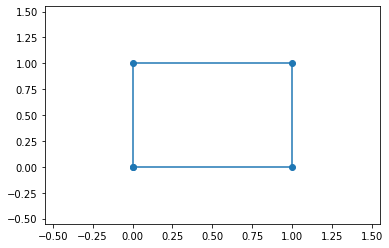

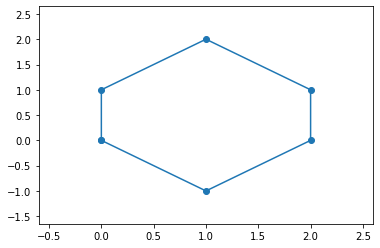

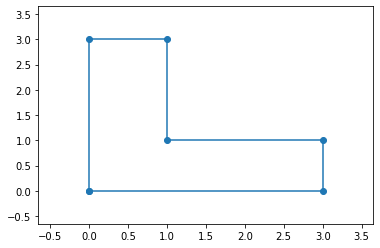

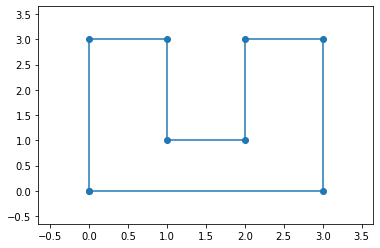

In [5]:
rectangle = [(0,0),(0,1),(1,1),(1,0)]
hexagon = [(0,0),(0,1),(1,2),(2,1),(2,0),(1,-1)]
l_shape = [(0,0),(0,3),(1,3),(1,1),(3,1),(3,0)]
concave = [(0,0),(0,3),(1,3),(1,1),(2,1),(2,3),(3,3),(3,0)]

for points in [rectangle, hexagon, l_shape, concave]:
    plt.plot(*zip(*(points+points[:1])), marker='o')

    automin, automax = plt.xlim()
    plt.xlim(automin-0.5, automax+0.5)
    automin, automax = plt.ylim()
    plt.ylim(automin-0.5, automax+0.5)

    plt.show()

In [ ]:
    #p = PatchCollection(patches, alpha=0.8)
    #p.set_array(np.array(colors))
    #ax.add_collection(p)
    
    #     automin, automax = ax.get_xlim()
    #     plt.xlim(automin-0.5, automax+0.5)
    #     automin, automax = ax.get_ylim()
    #     plt.ylim(automin-0.5, automax+0.5)
    
    #     plt.xlim(automin-0.5, 3+0.5)
    #     plt.ylim(automin-0.5, 2+0.5)

In [243]:
def new_shape(vertices, color='navajowhite', lw=.25):

    assert len(vertices) >= 3, 'At least 3 vertices to form a shape'

    colors = {
        'n': cor_area_nn,
        'p': cor_area_p,
        'b': cor_area_b
    }
    
    color = colors[color] if color in colors else color
    
    codes = [Path.MOVETO]
    for i in range(1, len(vertices)-1):
        codes.append(Path.LINETO)
    codes.append(Path.CLOSEPOLY)
    
    path = Path(vertices, codes)

    patch = patches.PathPatch(path, facecolor=color, lw=lw, alpha=0.6)

    return patch




def plot_map(areas, labels, origem, destino, waypoints):
        
    patches = [ new_shape(vertice, color=label) for vertice, label in zip(areas, labels) ]


    fig, ax = plt.subplots(figsize=(8,8)) 
    
    # Plot areas
    for patch in patches:
        ax.add_patch(patch)
        
    # Plot origin and destination
    ax.plot([origem[0], destino[0]], [origem[1], destino[1]], 'o', color=cor_ori_dest)
    
    # Plot waypoints and route
    waypoints = list(map(list, zip(*waypoints)))
    ax.plot(waypoints[0], waypoints[1], color=cor_waypoints, marker='x', linestyle='solid', linewidth=2)
    
    # Set size
    automin, automax = ax.get_xlim()
    plt.xlim(automin-0.5, automax+0.5)
    automin, automax = ax.get_ylim()
    plt.ylim(automin-0.5, automax+0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.show()
    
    
    
    



In [244]:
cor_area_nn    = '#25283d' # Yankees Blue
cor_area_p     = '#8f3985' # Plum
cor_area_b     = '#07beb8' # Tiffany Blue
cor_waypoints  = '#aa1155' # Jazzberry Jam
cor_ori_dest   = '#880044' # Pink Raspberry

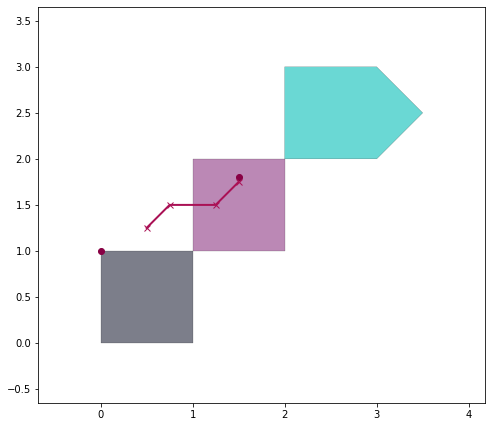

In [248]:
verts1 = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
]

verts2 = [
    (1., 1.), # left, bottom
    (1., 2.), # left, top
    (2., 2.), # right, top
    (2., 1.), # right, bottom
    (1., 1.), # ignored
]

verts3 = [
    (2., 2.), # left, bottom
    (2., 3.), # left, top
    (3., 3.), # right, top
    (3.5, 2.5), # right, bottom
    (3., 2.), # right, bottom
    (1., 1.), # ignored
]

plot_map([verts1, verts2, verts3], 
         ['n', 'p', 'b'], 
         [0, 1.], 
         [1.5,1.8], 
         [[0.5,1.25],[0.75,1.5],[1.25,1.5],[1.5,1.75]]
)

In [1]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1.5, 4.5],
    y=[0.75, 0.75],
    text=["Unfilled Rectangle", "Filled Rectangle"],
    mode="text",
))

# Set axes properties
fig.update_xaxes(range=[0, 7], showgrid=False)
fig.update_yaxes(range=[0, 3.5])

# Add shapes
fig.update_layout(
    shapes=[
        # unfilled Rectangle
        go.layout.Shape(
            type="rect",
            x0=1,
            y0=1,
            x1=2,
            y1=3,
            line=dict(
                color="RoyalBlue",
            ),
        ),
        # filled Rectangle
        go.layout.Shape(
            type="rect",
            x0=3,
            y0=1,
            x1=6,
            y1=2,
            line=dict(
                color="RoyalBlue",
                width=2,
            ),
            fillcolor="LightSkyBlue",
        ),
    ]
)

fig.show()


ModuleNotFoundError: No module named 'plotly'